Plots win rate of victim X vs. an adversary trained on victim Y.

In [2]:
import matplotlib.pyplot as plt

import utils

plt.style.use(
    ["tableau-colorblind10", utils.get_style("default"), utils.get_style("2-col")]
)

### Adversary trained on cp505

In [6]:
df = utils.parse_sgfs(
    [
        "/nas/ucb/k8/go-attack/match/ttseng-unhardened-paper-eval-221130/ttseng-transfer-cp505-20221205-000314"
    ]
)
utils.parse_for_match(df, victim_name_prefix="cp127-v")
df["victim_net"] = df.victim_name.str.slice(stop=len("cp505"))

print(len(df))
print(df.victim_name.unique())
print(df.victim_net.unique())
print(df.victim_visits.unique())
print(df.adv_name.unique())

3000
['cp505-v4' 'cp127-v32' 'cp505-v256' 'cp127-v64' 'cp505-v16' 'cp505-v2'
 'cp505-v512' 'cp127-v1' 'cp127-v8' 'cp505-v128' 'cp127-v16' 'cp505-v32'
 'cp127-v512' 'cp127-v128' 'cp505-v64' 'cp505-v8' 'cp127-v256' 'cp127-v2'
 'cp127-v4' 'cp505-v1']
['cp505' 'cp127']
[  4  32 256  64  16   2 512   1   8 128]
['adv-s34090496-v600-AMCTS-S']


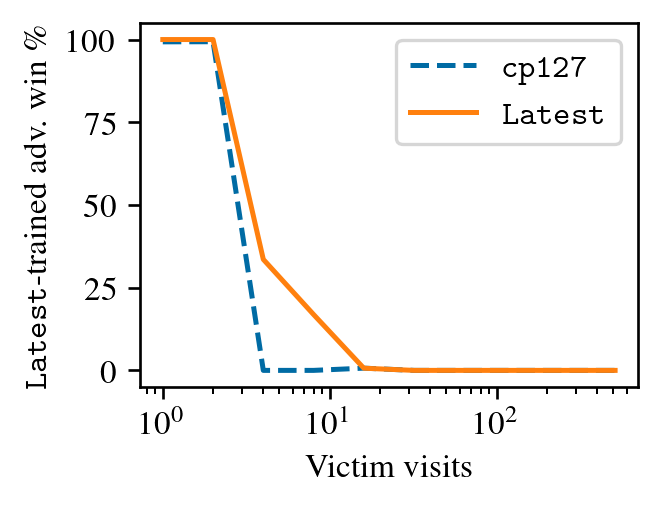

In [7]:
fig, axs = plt.subplots(1, 1)

victim_net: str
for victim_net in reversed(df.victim_net.unique()):
    (
        100
        * df.query(f"victim_net == '{victim_net}'")
        .groupby("victim_visits")
        .mean(numeric_only=True)
        .adv_win
    ).plot(
        label="$\\texttt{Latest}$" if victim_net == "cp505" else "$\\texttt{cp127}$",
        linestyle="--" if victim_net == "cp127" else None,
    )

plt.ylim(-5, 105)
plt.xscale("log")
plt.ylabel("$\\texttt{Latest}$-trained adv. win \\%")
plt.xlabel("Victim visits")
plt.legend()

plt.savefig("adv505-transfer.pgf", backend="pgf")

### b10 adversary trained on cp127

In [8]:
df = utils.parse_sgfs(
    [
        "/nas/ucb/k8/go-attack/match/ttseng-unhardened-paper-eval-221130/ttseng-transfer-cp127-20221205-000326"
    ]
)
utils.parse_for_match(df, victim_name_prefix="cp505-v")
df["victim_net"] = df.victim_name.str.slice(stop=len("cp505"))

print(len(df))
print(df.victim_name.unique())
print(df.victim_net.unique())
print(df.victim_visits.unique())
print(df.adv_name.unique())

3000
['cp127-v128' 'cp505-v32' 'cp127-v4' 'cp127-v2' 'cp505-v128' 'cp127-v512'
 'cp505-v1' 'cp505-v256' 'cp505-v8' 'cp127-v1' 'cp127-v256' 'cp505-v512'
 'cp505-v4' 'cp127-v64' 'cp505-v64' 'cp127-v32' 'cp505-v16' 'cp505-v2'
 'cp127-v16' 'cp127-v8']
['cp127' 'cp505']
[128  32   4   2 512   1 256   8  64  16]
['adv-s230746880-v600-AMCTS-S']


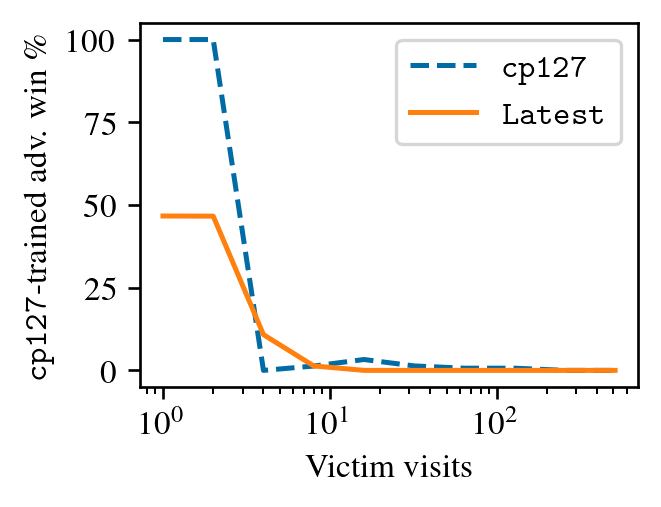

In [10]:
fig, axs = plt.subplots(1, 1)

victim_net: str
for victim_net in df.victim_net.unique():
    (
        100
        * df.query(f"victim_net == '{victim_net}'")
        .groupby("victim_visits")
        .mean(numeric_only=True)
        .adv_win
    ).plot(
        label="$\\texttt{Latest}$" if victim_net == "cp505" else "$\\texttt{cp127}$",
        linestyle="--" if victim_net == "cp127" else None,
    )

plt.ylim(-5, 105)
plt.xscale("log")
plt.ylabel("$\\texttt{cp127}$-trained adv. win \\%")
plt.xlabel("Victim visits")

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend()
plt.savefig("adv127-transfer.pgf", backend="pgf")